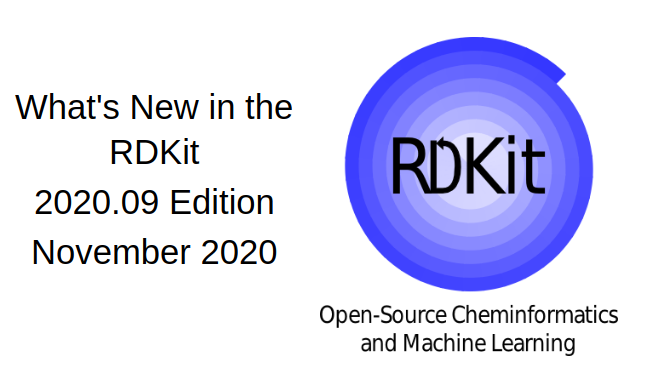

# Some logistics

This notebook is in github (the link is also in the description box): https://github.com/greglandrum/presentations/tree/master/RDKit_Webcast_20201110

The repo includes an environment.yml file so you can be sure to have a python environment that works for the demo.

In order to make the ipycytoscape views work after creating that environment I had to manually execute this command:
`jupyter nbextension enable --py widgetsnbextension`

If you have questions, please use the live chat box. I will try and keep an eye on this and answer questions as we go.

If you have feedback or suggestions, please use either the rdkit-discuss mailing list or the discourse group: https://rdkit.discourse.group/ 

# Let's get started... what's new in the v2020.09 of the RDKit?

Not an exhaustive list, just some examples.
For a complete list see the release notes:
https://github.com/rdkit/rdkit/releases/tag/Release_2020_09_1

# 2020 GSoC projects

## RDKit-MongoDB integration

**Student:** Christopher Zou

**Mentors:** Marco Stenta, Peter Gedeck, Greg Landrum

**GitHub URL:** https://github.com/rdkit/mongo-rdkit

Allows using molecules in MongoDB. Can do exact structure, substructure, and similarity searches.

## Generalized file reader, multi-threaded MolSupplier

**Student:** Shrey Aryan

**Mentors:** Greg Landrum, Dave Cosgrove, Andrew Dalke

Allows loading molecules from common file types without specifying the file type (and handles compressed files). Allows using multiple threads to load molecules from SmilesMolSuppliers and SDMolSuppliers.

## RDKit-ANI implementation

**Student:** Manan Goel

**Mentors:** Karl Leswing, Guillaume Godin, Greg Landrum

RDKit implementation of the ANI-1x and ANI-1ccx force fields.

# Documentation improvements

Here are some of the changes/improvements made to the RDKit documentation:

- The [RDKit Cookbook](https://github.com/rdkit/rdkit/blob/master/Docs/Book/Cookbook.rst) has been completely rewritten. Vin has a poster about this. (2020.03 release)
- Running the tests for the documentation is now part of the standard CI builds.
- [CXSMILES support documented](https://github.com/rdkit/rdkit/blob/master/Docs/Book/RDKit_Book.rst#cxsmiles-extensions)
- [SMARTS support (and extensions) documented](https://github.com/rdkit/rdkit/blob/master/Docs/Book/RDKit_Book.rst#smarts-support-and-extensions)


# New Features


## Simplified Javascript bindings
(ongoing, first added in 2019.09 release)

We've added a simplified version of the RDKit JavaScript bindings to the core distribution.

The idea is to keep this fairly minimal, to expose only the most important functionality.

The current wrappers support:
- parsing SMILES, SMARTS, or Mol blocks
- generating SMILES, Mol blocks, InChIs, and InChI keys
- calculating a set of 2D descriptors
- getting morgan fingerprints
- doing substructure searches
- generating SVG
- drawing to JS canvas (2020.09 release)
- abbreviations (2020.09 release)

A very basic demo of what's currently possible is here: https://rdkit.org/rdkitjs/beta/demo.html

And there's some documentation here:
https://rdkit.org/rdkitjs/beta/GettingStartedInJS.html

We're looking for feedback on what should be added to these wrappers.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2020.09.1


## ETKDG v3
(2020.03 release)

Now includes better ring conformers and support for macrocycles.
https://pubs.acs.org/doi/abs/10.1021/acs.jcim.0c00025

For more info take a look at Shuzhe's entry in the Cookbook:
https://github.com/rdkit/rdkit/blob/master/Docs/Book/Cookbook.rst#conformer-generation-with-etkdg


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

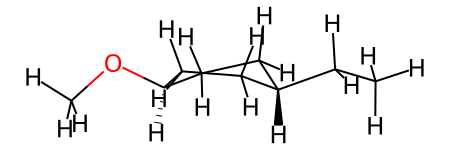

In [2]:
IPythonConsole.ipython_3d = True
m1 = Chem.AddHs(Chem.MolFromSmiles('CO[C@H]1CC[C@@H](CC)CC1'))
ps = AllChem.ETKDGv2()
ps.randomSeed = 123
AllChem.EmbedMolecule(m1,ps)
m1

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

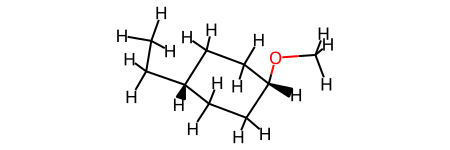

In [3]:
m2 = Chem.Mol(m1)
ps = AllChem.ETKDGv3()
ps.randomSeed = 123
ps.useSmallRingTorsions=True
AllChem.EmbedMolecule(m2,ps)
m2

## Scaffold Network implementation
(2020.03 release)

https://doi.org/10.1021/acs.jcim.0c00296

In [4]:
from rdkit.Chem.Scaffolds import rdScaffoldNetwork

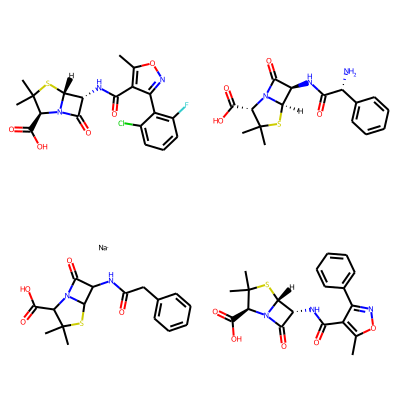

In [5]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
ms = [flu,amp,pen,ox]
Draw.MolsToGridImage(ms,molsPerRow=2)

In [6]:
from rdkit.Chem.Draw import rdMolDraw2D
import networkx as nx
from networkx.readwrite import cytoscape_data
from urllib import parse

# some code borrowed from pen: 
# https://iwatobipen.wordpress.com/2020/03/30/draw-scaffold-tree-as-network-with-molecular-image-rdkit-cytoscape/
def smi2svg(smi):
    mol = Chem.MolFromSmiles(smi)
    try:
        Chem.rdmolops.Kekulize(mol)
    except:
        pass
    drawer = rdMolDraw2D.MolDraw2DSVG(350, 300)
    rdMolDraw2D.PrepareAndDrawMolecule(drawer,mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg
  
def smi2image(smi):
    svg_string = smi2svg(smi)
    impath = 'data:image/svg+xml;charset=utf-8,' + parse.quote(svg_string, safe="")
    return impath

# adaptated version of code from https://rdkit.blogspot.com/2020/09/interactively-exploring-scaffoldnetwork.html
import ipycytoscape
import ipywidgets as widgets
from ipywidgets import interact,fixed
from rdkit import RDLogger
def show_scaffolds(mols,which=None,layout='dagre',includeGenericScaffolds=False,includeGenericBondScaffolds=False,
                   includeScaffoldsWithAttachments=True,includeScaffoldsWithoutAttachments=False,
                   pruneBeforeFragmenting=True,
                  keepOnlyFirstFragment=True):
    # the scaffold generation process is verbose, disable the messages sent to the info log:
    RDLogger.DisableLog('rdApp.info')

    if which is not None:
        mols = [mols[which]]
    scaffParams = rdScaffoldNetwork.ScaffoldNetworkParams()
    scaffParams.collectMolCounts = True
    scaffParams.includeGenericScaffolds = includeGenericScaffolds
    scaffParams.includeScaffoldsWithoutAttachments = includeScaffoldsWithoutAttachments
    scaffParams.keepOnlyFirstFragment = keepOnlyFirstFragment
    scaffParams.includeGenericBondScaffolds = includeGenericBondScaffolds
    scaffParams.includeScaffoldsWithAttachments = includeScaffoldsWithAttachments
    scaffParams.pruneBeforeFragmenting = pruneBeforeFragmenting
    net = rdScaffoldNetwork.CreateScaffoldNetwork(mols,scaffParams)

    g = nx.graph.Graph()
    for idx, node in enumerate(net.nodes):
        g.add_node(idx, count=f'count: {net.molCounts[idx]}', 
                   smiles=node, img=smi2image(node), 
                   hac=Chem.MolFromSmiles(node).GetNumAtoms())
    g.add_edges_from([(e.beginIdx,e.endIdx) for e in net.edges])
    
    directed = ipycytoscape.CytoscapeWidget()
    directed.set_style([{
                            'selector': 'node',
                            'css': {
                                'content': 'data(count)',
                                'text-valign': 'top',
                                'color': 'white',
                                'text-outline-width': 2,
                                'text-outline-color': '#9dbaea',
                                'shape' : 'rectangle',
                                'width':350,
                                'height':300,
                                'background-color': '#9dbaea',
                                'background-fit':'contain',
                                'background-image':'data(img)',

                            }
                            },
                            {
                            'selector': 'edge',
                            'style': {
                                'width': 4,
                                'line-color': '#9dbaea',
                                'target-arrow-shape': 'triangle',
                                'target-arrow-color': '#9dbaea',
                                'curve-style': 'bezier'
                            }
                            },
                            {
                            'selector': ':selected',
                            'css': {
                                'background-color': 'black',
                                'line-color': 'black',
                                'target-arrow-color': 'black',
                                'source-arrow-color': 'black',
                                'text-outline-color': 'black'
                            }}
                            ])
    directed.set_layout(name=layout, nodeSpacing=50, edgeLengthVal=50)
    directed.graph.add_graph_from_networkx(g, directed=True)
    return directed



In [7]:
show_scaffolds(ms)

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'nodeSpacing': 50, 'edgeLengthVal': 50}, cytoscape_style=[{…

In [8]:
@interact(mols=fixed(ms),which=range(0,len(ms)),layout=['dagre','breadthfirst','concentric','cose'])
def interactively_show_scaffolds(mols,which=None,show_all=False,layout='dagre',includeGenericScaffolds=False,includeGenericBondScaffolds=False,
                   includeScaffoldsWithAttachments=True,includeScaffoldsWithoutAttachments=False,
                   pruneBeforeFragmenting=True,
                  keepOnlyFirstFragment=True):
    # the scaffold generation process is verbose, disable the messages sent to the info log:
    RDLogger.DisableLog('rdApp.info')

    if which is None and not show_all:
        return
    return show_scaffolds(mols,which=which,layout=layout,includeGenericScaffolds=includeGenericScaffolds,
                          includeGenericBondScaffolds=includeGenericBondScaffolds,
                          includeScaffoldsWithAttachments=includeScaffoldsWithAttachments,
                         includeScaffoldsWithoutAttachments=includeScaffoldsWithoutAttachments,
                         pruneBeforeFragmenting=pruneBeforeFragmenting,keepOnlyFirstFragment=keepOnlyFirstFragment)

interactive(children=(Dropdown(description='which', options=(0, 1, 2, 3), value=None), Checkbox(value=False, d…

## Reproducibly getting multiple random SMILES strings for a molecule

This is something which is frequently used to do data augmentation when training neural networks which operate directly on SMILES.

In [9]:
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
Chem.MolToRandomSmilesVect(m,5)

['C(CC)(C)Oc1cnc(cc1)O',
 'CCC(Oc1cnc(O)cc1)C',
 'CC(Oc1ccc(nc1)O)CC',
 'c1cc(ncc1OC(CC)C)O',
 'C(C)C(Oc1cnc(O)cc1)C']

By default the results are not reproducible:

In [10]:
Chem.MolToRandomSmilesVect(m,5)

['n1cc(OC(C)CC)ccc1O',
 'c1c(cnc(O)c1)OC(C)CC',
 'c1nc(O)ccc1OC(C)CC',
 'Oc1ncc(cc1)OC(CC)C',
 'n1c(O)ccc(OC(C)CC)c1']

But we can provide a random number seed:

In [11]:
v1 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
v1

['Oc1ccc(OC(CC)C)cn1',
 'CC(CC)Oc1cnc(O)cc1',
 'c1(O)ncc(cc1)OC(C)CC',
 'c1cc(cnc1O)OC(CC)C',
 'c1c(OC(CC)C)cnc(c1)O']

In [12]:
v2 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
v2 == v1

True

## Improvements to reaction chirality handling
(2020.09 release)

The recognition and handling of chirality in reactions has been significantly improved.

Here are some examples which are now properly handled:

Rearranged attachments on the chiral center:

In [13]:
from rdkit.Chem import AllChem
rxn = AllChem.ReactionFromSmarts('[C:1][C@:2]([F:3])[Br:4]>>[C:1][C@@:2]([S:4])[F:3]')
mol = Chem.MolFromSmiles('C[C@@H](F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@@H](F)S'

Adding a neighbor to a chiral atom:

In [14]:
rxn = AllChem.ReactionFromSmarts('[C:1][C@H:2]([F:3])[Br:4]>>[C:1][C@@:2](O)([F:3])[Br:4]')
mol = Chem.MolFromSmiles('C[C@@H](F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@](O)(F)Br'

Removing an atom from a chiral atom:

In [15]:
rxn = AllChem.ReactionFromSmarts('[C:1][C@:2](O)([F:3])[Br:4]>>[C:1][C@@H:2]([F:3])[Br:4]')
mol = Chem.MolFromSmiles('C[C@@](O)(F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@H](F)Br'

## Deprotections
(2020.09 release)



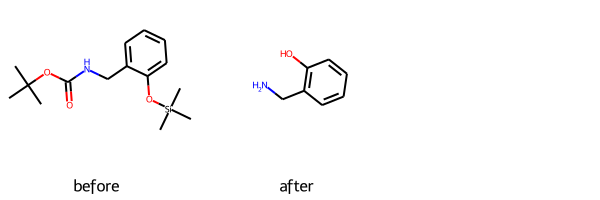

In [16]:
from rdkit.Chem import rdDeprotect
smiles = "N(C(=O)OC(C)(C)C)Cc1ccccc1O[Si](C)(C)C"
mol = Chem.MolFromSmiles(smiles)
deprotected_mol = rdDeprotect.Deprotect(mol)
Draw.MolsToGridImage((mol,deprotected_mol),legends=('before','after'))

In [17]:
print(list(deprotected_mol.GetPropsAsDict()["DEPROTECTIONS"]))

['TMS', 'Boc']


Look at the deprotections available:

In [18]:
dv = rdDeprotect.GetDeprotections()
for dd in dv:
    print(dd.abbreviation,dd.deprotection_class,dd.example)

TBDMS alcohol CC(C)(C)[Si](C)(C)OC>>OC
MMT alcohol COc1ccc(C(ON)(c2ccccc2)c2ccccc2)cc1>>NO
THP alcohol COC1CCCCO1>>CO
MOM alcohol COCOC>>CO
MEM alcohol C(C)(C)OCOCCOC>>C(C)(C)O
Bn alcohol NOc1ccccc1>>ON
TMS alcohol NO[Si](C)(C)C>>NO
Bz alcohol COC(=O)c1ccccc1>>OC
Piv alcohol CC(C)(C)C(=O)ON>>NO
TIPS alcohol NO[Si](C(C)C)(C(C)C)(C(C)C)>>ON
Ac alcohol NOC(=O)C>>NO
PMB alcohol c1cc(OC)ccc1CON>>NO
Tr alcohol CN(C)C(c1ccccc1)(c1ccccc1)c1ccccc1>>CNC
Phth amine O=C1N(C(=O)c2ccccc12)C1=CC=CC=C1>>Nc1ccccc1
SEM amine C[Si](C)(C)CCOCNO>>NO
PMP amine COc1ccc(NO)cc1>>NO
Ts amine Cc1ccc(cc1)S(NO)(=O)=O>>NO
Boc amine N(C(=O)OC(C)(C)C)Cc1ccccc1NC(=O)OC(C)(C)C>>NCc1ccccc1N
TFA amine ONC(=O)C(F)(F)F>>NO
Bz amine ONC(=O)c1ccccc1>>NO
Fmoc amine CN(C)C(=O)OCC1C2=CC=CC=C2C2=C1C=CC=C2>>CNC
Bn amine CN(C)Cc1ccccc1>>CNC
Ac amine N(C)(C)C(=O)C>>CNC
Cbz amine N(C)(C)C(=O)OCc1ccccc1>>CNC
Acetyl/Ketal carbonyl O=C(OC)C1CCC(OC2)(OC2)CC1>>COC(=O)C1CCC(O)CC1


We can also choose to apply only particular deprotections:

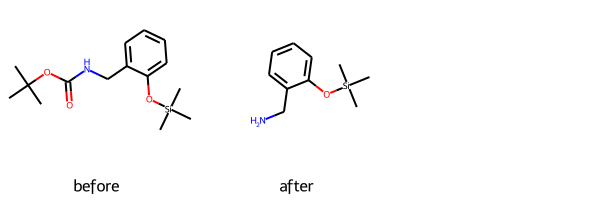

In [19]:
only_amines = [x for x in rdDeprotect.GetDeprotections() if x.deprotection_class=='amine']
deprotected_mol = rdDeprotect.Deprotect(mol,only_amines)
Draw.MolsToGridImage((mol,deprotected_mol),legends=('before','after'))

## MolDraw2D improvements
(ongoing, this example shows features added for 2020.03 and 2020.09)



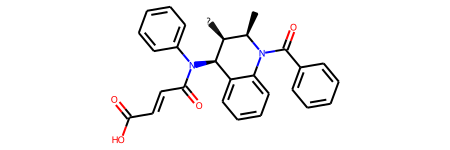

In [20]:
mol = Chem.MolFromSmiles('C[C@@H]1[C@H](*)[C@H](N(C(=O)/C=C/C(O)=O)C2=CC=CC=C2)C2=CC=CC=C2N1C(=O)C1=CC=CC=C1 |&1:1,4|')
mol

In [21]:
from rdkit.Chem.Draw import rdMolDraw2D
import ipywidgets as widgets
from ipywidgets import interact,fixed
from IPython.display import SVG,Image

@interact(mol=fixed(mol),)
def show_mol(mol,useSVG=True,addAtomIndices=False,addBondIndices=False,addStereoAnnotation=False,explicitMethyl=False,
         dummiesAreAttachments=False,blackAndWhite=False,minFontSize="4",maxFontSize="40",legend=""):
    if useSVG:
        d = rdMolDraw2D.MolDraw2DSVG(350,300)
    else:
        d = rdMolDraw2D.MolDraw2DCairo(350,300)
    dos = d.drawOptions()
    dos.addAtomIndices=addAtomIndices
    dos.addBondIndices=addBondIndices
    dos.addStereoAnnotation = addStereoAnnotation
    dos.explicitMethyl = explicitMethyl
    dos.dummiesAreAttachments = dummiesAreAttachments
    dos.minFontSize = int(minFontSize)
    dos.maxFontSize = int(maxFontSize)
    if blackAndWhite:
        dos.useBWAtomPalette()
    d.DrawMolecule(mol,legend=legend)
    d.FinishDrawing()
    if useSVG:
        return SVG(d.GetDrawingText())
    else:
        return Image(d.GetDrawingText())

interactive(children=(Checkbox(value=True, description='useSVG'), Checkbox(value=False, description='addAtomIn…

### Storing molecule metadata in PNGs

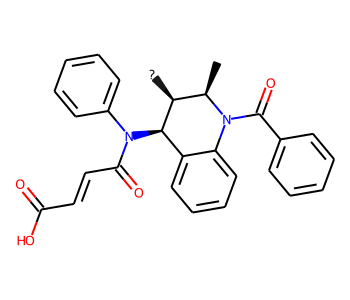

In [22]:
d2d = rdMolDraw2D.MolDraw2DCairo(350,300)
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
png = d2d.GetDrawingText()
Image(png)

*[C@@H]1[C@H](N(C(=O)/C=C/C(=O)O)c2ccccc2)c2ccccc2N(C(=O)c2ccccc2)[C@@H]1C |(-0.919531,3.13719,;0.0396163,1.98392,;-0.479573,0.576636,;-1.95791,0.322627,;-2.4771,-1.08466,;-1.51795,-2.23793,;-3.95544,-1.33866,;-4.47463,-2.74595,;-5.95296,-2.99996,;-6.91211,-1.84668,;-6.47215,-4.40724,;-2.91706,1.4759,;-2.39787,2.88318,;-3.35701,4.03645,;-4.83535,3.78244,;-5.35454,2.37516,;-4.39539,1.22189,;0.479573,-0.576636,;-0.0396163,-1.98392,;0.919531,-3.13719,;2.39787,-2.88318,;2.91706,-1.4759,;1.95791,-0.322627,;2.4771,1.08466,;3.95544,1.33866,;4.47463,2.74595,;4.91458,0.185392,;4.39539,-1.22189,;5.35454,-2.37516,;6.83288,-2.12115,;7.35207,-0.713871,;6.39292,0.439401,;1.51795,2.23793,;2.03714,3.64521,),&1:2,32|


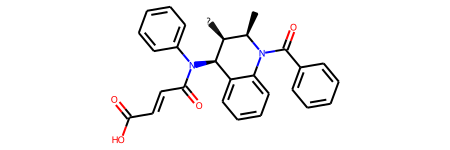

In [23]:
newMol = Chem.MolFromPNGString(png)
print(Chem.MolToCXSmiles(newMol))
newMol

It also works with multiple molecules:

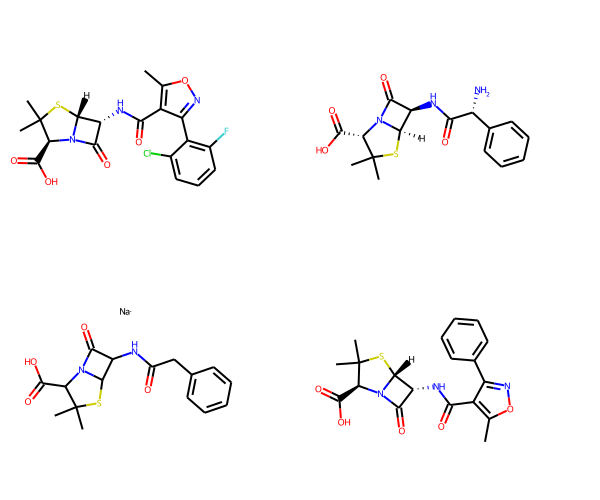

In [24]:
d2d = rdMolDraw2D.MolDraw2DCairo(600,500,300,250)
d2d.DrawMolecules((flu,amp,pen,ox))
d2d.FinishDrawing()
png = d2d.GetDrawingText()
Image(png)

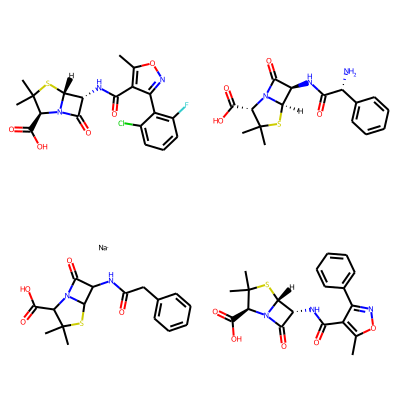

In [25]:
mols = Chem.MolsFromPNGString(png)
Draw.MolsToGridImage(mols,molsPerRow=2)

And reactions

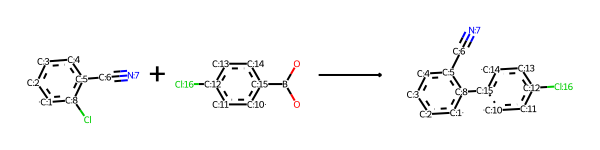

In [26]:
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts("[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[Cl].\
[cH:10]:1:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:[cH:15]:1-B(-O)-O>>\
[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[cH:15]:1[cH:10]:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:1")
rxn

In [27]:
d2d = rdMolDraw2D.MolDraw2DCairo(600,300)
d2d.DrawReaction(rxn)
d2d.FinishDrawing()
png = d2d.GetDrawingText()

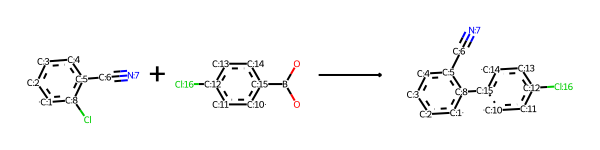

In [28]:
nrxn = rdChemReactions.ReactionFromPNGString(png)
nrxn

And there are functions there to store/retrieve additional metadata. This currently only supports adding strings.

In [29]:
props = {'yield':'83%','solvent':'dioxane','catalyst':'NiCl2(dppp), K3PO4'}
npng = Chem.AddMetadataToPNGString(props,png)
nprops = Chem.MetadataFromPNGString(npng)
nprops.keys()

dict_keys(['rdkitReactionPKL rdkit 2020.09.1', 'ReactionSmarts rdkit 2020.09.1', 'yield', 'solvent', 'catalyst'])

For technical reasons, the results come back as `bytes` objects:

In [30]:
nprops['yield']

b'83%'

### MolDraw2DJS
(2020.09 release)

We've added a version of the drawing code which works with the HTML5 canvas. This is only available in the RDKit JavaScript wrappers. It supports the same options as the other `MolDraw2D` classes.

You can try it out here: https://rdkit.org/rdkitjs/beta/demo.html

And there's a bit of documentation here: https://rdkit.org/rdkitjs/beta/GettingStartedInJS.html

A bit of sample JS showing how to use it:
```
    var mol = Module.get_mol("c1ccccc1OC");
    var canvas = document.getElementById("rdkit-canvas");
    mol.draw_to_canvas(canvas, -1, -1);
```


### Better highlighting

Here's an extreme example of what's now possible, from a recent RDKit blog post:
http://rdkit.blogspot.com/2020/10/molecule-highlighting-and-r-group.html

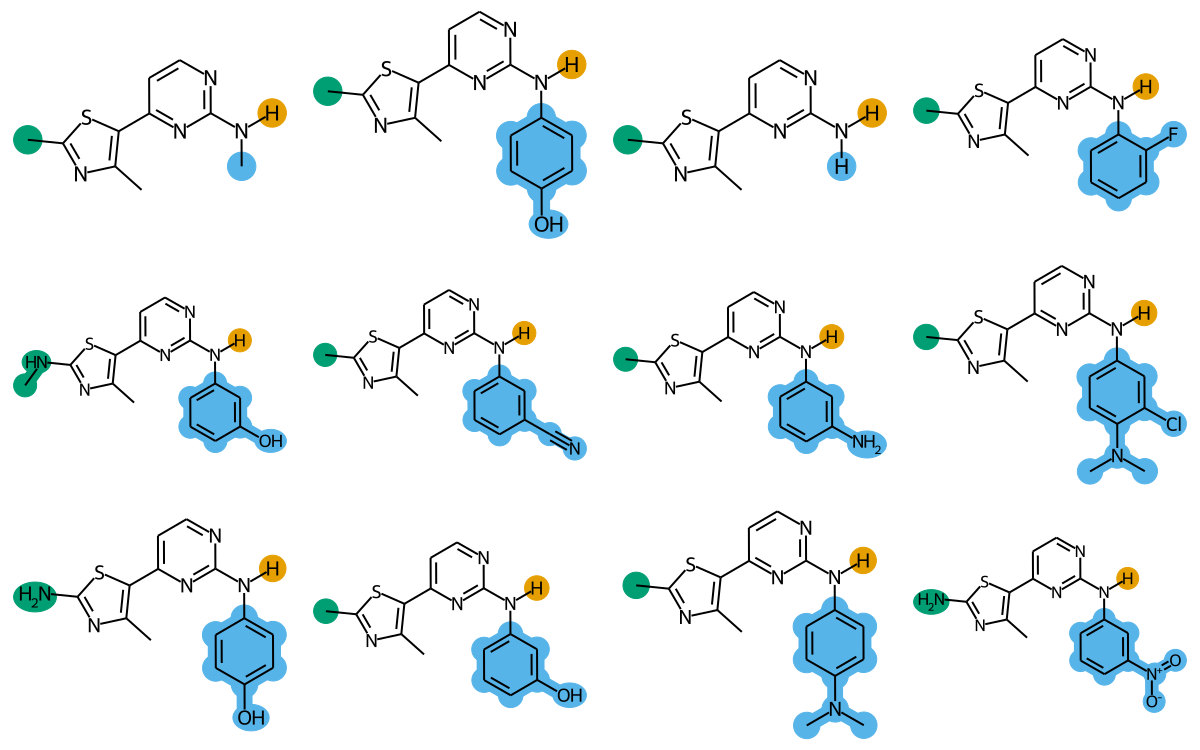

## Abbreviations
(2020.09 release)


In [31]:
IPythonConsole.molSize = (300,250)

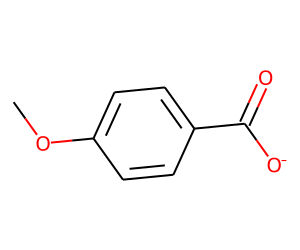

In [32]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

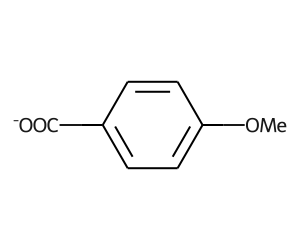

In [33]:
from rdkit.Chem import rdAbbreviations
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

Abbreviations that cover more than 40% of the molecule won't be applied by default:

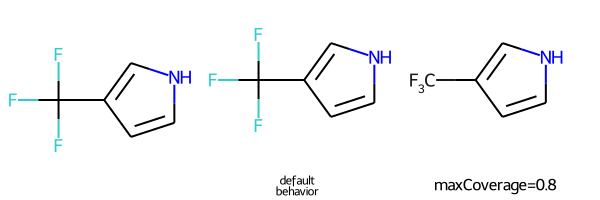

In [34]:
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)F')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,maxCoverage=0.8)
Draw.MolsToGridImage((m,nm1,nm2),legends=('','default\nbehavior','maxCoverage=0.8'))

Can also annotate the abbreviation info as SGroups:

In [35]:
m = Chem.MolFromSmiles('CC(F)(F)F')
nm = rdAbbreviations.LabelMolAbbreviations(m,abbrevs,maxCoverage=1)
print(Chem.MolToV3KMolBlock(nm))


     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 5 4 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 0 0 0 0
M  V30 2 C 1.29904 0.75 0 0
M  V30 3 F 2.59808 1.5 0 0
M  V30 4 F 2.04904 -0.549038 0 0
M  V30 5 F 0.549038 2.04904 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 2 4
M  V30 4 1 2 5
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SUP 0 ATOMS=(4 2 3 4 5) XBONDS=(1 1) LABEL=CF3 SAP=(3 2 1 1)
M  V30 END SGROUP
M  V30 END CTAB
M  END



That doesn't affect how the molecule is rendered:

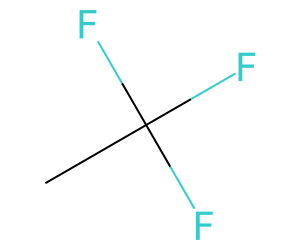

In [36]:
nm

But we can condense the Sgroup abbreviations:

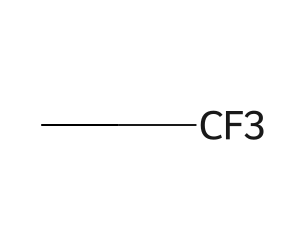

In [37]:
nm2 = rdAbbreviations.CondenseAbbreviationSubstanceGroups(nm)
nm2

## Improvements to coordgen integration
(2020.09 release)

In [38]:
IPythonConsole.molSize = (450,400)

In [39]:
from rdkit.Chem import rdCoordGen
from rdkit.Chem import rdDepictor

First an example of why using CoordGen is desirable:

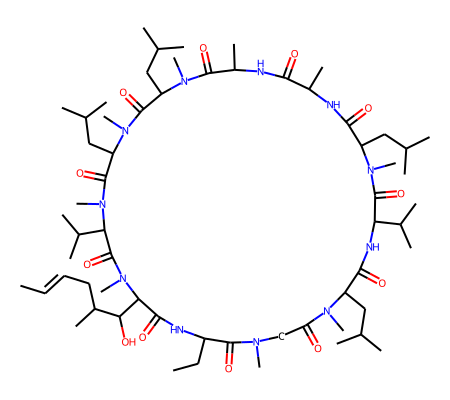

In [40]:
rdDepictor.SetPreferCoordGen(False)
cyclosporine = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')
cyclosporine

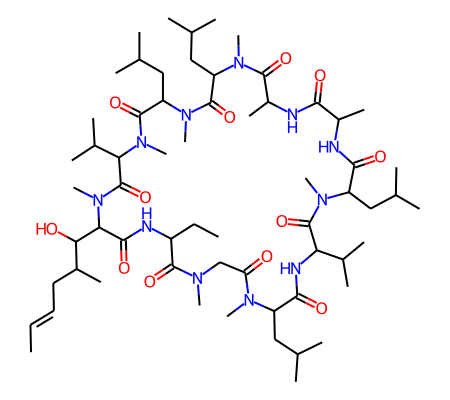

In [41]:
rdCoordGen.AddCoords(cyclosporine)
cyclosporine

### Changing `minimizerPrecision`

In order to speed up using coordgen, we've changed the default precision which is used when generating coordinates, but have also exposed a new parameter allowing you to change it back. Here are a couple of examples showing the impact

In [42]:
%timeit rdCoordGen.AddCoords(cyclosporine)

78.8 ms ± 505 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
ps = rdCoordGen.CoordGenParams()
ps.minimizerPrecision= ps.sketcherStandardPrecision # default is: ps.sketcherCoarsePrecision
%timeit rdCoordGen.AddCoords(cyclosporine,ps)

133 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


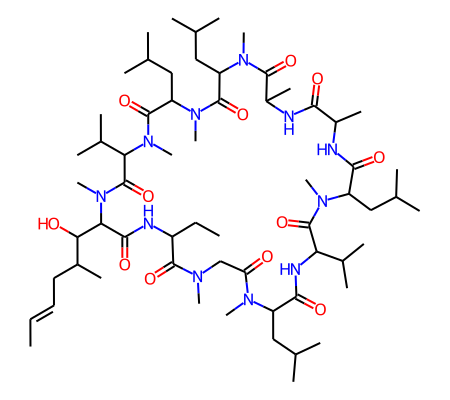

In [44]:
rdCoordGen.AddCoords(cyclosporine,ps)
cyclosporine

A more extreme example

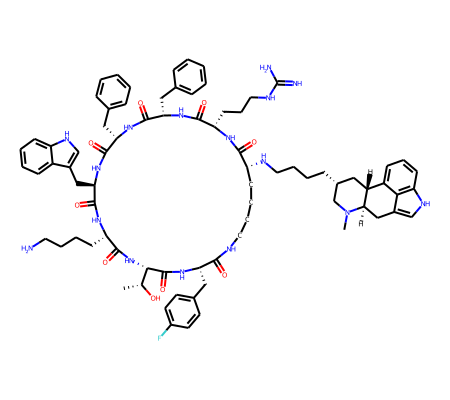

In [45]:
m = Chem.MolFromSmiles('C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](NCCCC[C@@H]2C[C@@H]3c4cccc5[nH]cc(c45)C[C@H]3N(C)C2)CCCCNC(=O)[C@H](Cc2ccc(F)cc2)NC1=O')
m

In [46]:
%timeit rdCoordGen.AddCoords(m)

135 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


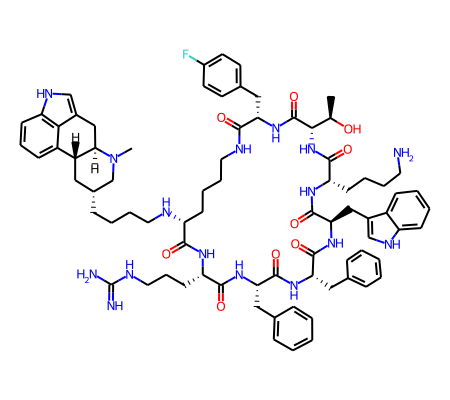

In [47]:
m

In [48]:
ps = rdCoordGen.CoordGenParams()
ps.minimizerPrecision=ps.sketcherStandardPrecision # default is: ps.sketcherCoarsePrecision
%timeit rdCoordGen.AddCoords(m,ps)

672 ms ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


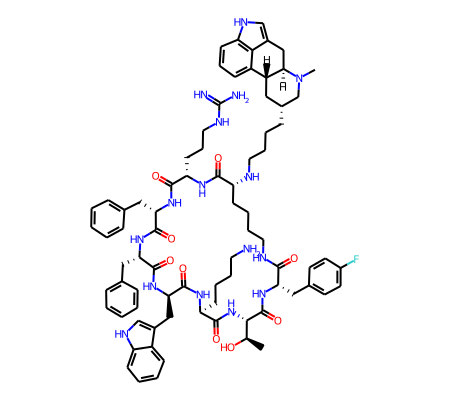

In [49]:
m

### Just using the coordgen minimizer

Start with a molecule which is not drawn particularly well:

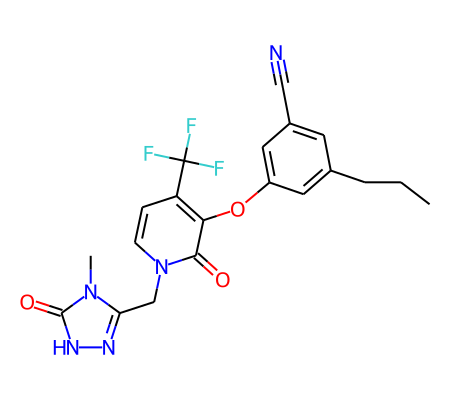

In [50]:
mb = '''
  Mrv2014 11042013552D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 31 33 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 7.9686 2.4348 0 0
M  V30 2 N 7.9686 1.396 0 0
M  V30 3 C 8.8089 0.7855 0 0
M  V30 4 N 8.4879 -0.2025 0 0
M  V30 5 N 7.4492 -0.2025 0 0
M  V30 6 C 7.1283 0.7855 0 0
M  V30 7 O 6.1403 1.1065 0 0
M  V30 8 C 9.7968 1.1065 0 0
M  V30 9 N 10.0128 2.1225 0 0
M  V30 10 C 9.2408 2.8175 0 0
M  V30 11 C 9.4568 3.8336 0 0
M  V30 12 C 10.4446 4.1545 0 0
M  V30 13 C 11.2166 3.4595 0 0
M  V30 14 C 11.0006 2.4434 0 0
M  V30 15 O 11.7726 1.7484 0 0
M  V30 16 O 12.2044 3.7804 0 0
M  V30 17 C 13.117 4.5468 0 0
M  V30 18 C 12.9187 5.5665 0 0
M  V30 19 C 13.7027 6.2479 0 0
M  V30 20 C 14.6848 5.9098 0 0
M  V30 21 C 14.8829 4.8902 0 0
M  V30 22 C 14.099 4.2086 0 0
M  V30 23 C 15.8651 4.552 0 0
M  V30 24 C 13.5045 7.2675 0 0
M  V30 25 N 13.3062 8.2872 0 0
M  V30 26 C 10.6607 5.1706 0 0
M  V30 27 F 10.8766 6.1866 0 0
M  V30 28 F 11.6766 4.9546 0 0
M  V30 29 F 9.6446 5.3865 0 0
M  V30 30 C 16.9038 4.552 0 0
M  V30 31 C 17.7279 3.9197 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 2 3 4
M  V30 4 1 4 5
M  V30 5 1 5 6
M  V30 6 1 2 6
M  V30 7 2 6 7
M  V30 8 1 3 8
M  V30 9 1 8 9
M  V30 10 1 9 10
M  V30 11 2 10 11
M  V30 12 1 11 12
M  V30 13 2 12 13
M  V30 14 1 13 14
M  V30 15 1 9 14
M  V30 16 2 14 15
M  V30 17 1 13 16
M  V30 18 1 16 17
M  V30 19 2 17 18
M  V30 20 1 18 19
M  V30 21 2 19 20
M  V30 22 1 20 21
M  V30 23 2 21 22
M  V30 24 1 17 22
M  V30 25 1 21 23
M  V30 26 1 19 24
M  V30 27 3 24 25
M  V30 28 1 12 26
M  V30 29 1 26 27
M  V30 30 1 26 28
M  V30 31 1 26 29
M  V30 32 1 23 30
M  V30 33 1 30 31
M  V30 END BOND
M  V30 END CTAB
M  END
'''
m = Chem.MolFromMolBlock(mb)
m

Doing a normal AddCoords redraws the entire molecule:

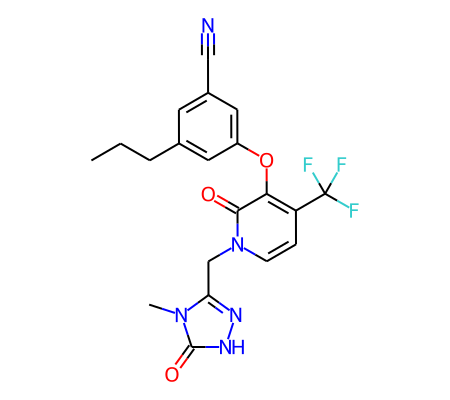

In [51]:
nm = Chem.Mol(m)
rdCoordGen.AddCoords(nm)
nm

But we can do `minimizeOnly` and just leave most of the structure intact

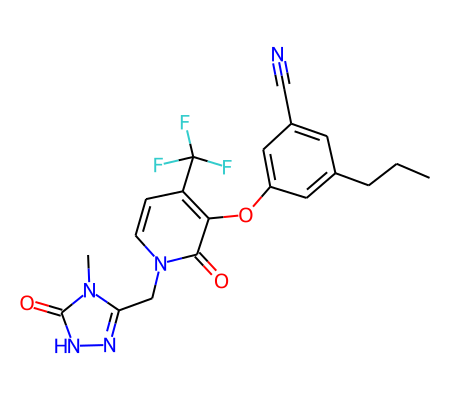

In [52]:
nm = Chem.Mol(m)
ps = rdCoordGen.CoordGenParams()
ps.minimizeOnly=True
rdCoordGen.AddCoords(nm,ps)
nm

This isn't a complete replacement for generating coordinates with a fixed core, but it can be quite useful for quick cleanups of 2D structures, particularly when no core definition is available

## Tautomer enumeration and canonicalization
(2020.03 release)

In [53]:
IPythonConsole.molSize = (250,200)

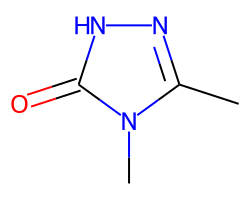

In [54]:
from rdkit.Chem.MolStandardize import rdMolStandardize
te = rdMolStandardize.TautomerEnumerator()

tm = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)C')
tm

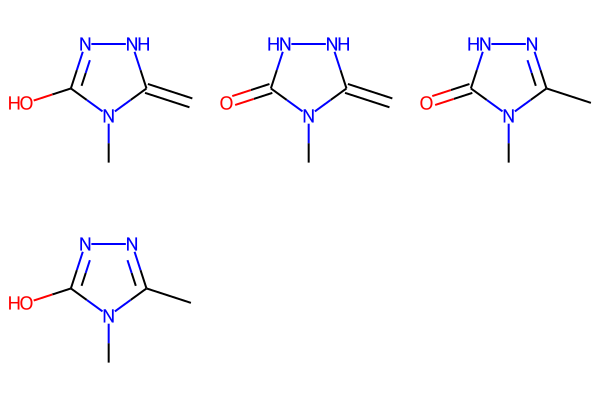

In [55]:
tauts = te.Enumerate(tm)
Draw.MolsToGridImage(tauts)

We can also ask for a canonical tautomer

An important caveat about this from the docs:

>Note that the canonical tautomer is very likely not the most stable tautomer
      for any given conditions. The default scoring rules are designed to produce
      "reasonable" tautomers, but the primary concern is that the results are
      canonical: you always get the same canonical tautomer for a molecule
      regardless of what the input tautomer or atom ordering were.

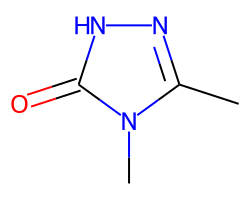

In [56]:
ctaut = te.Canonicalize(tm)
ctaut

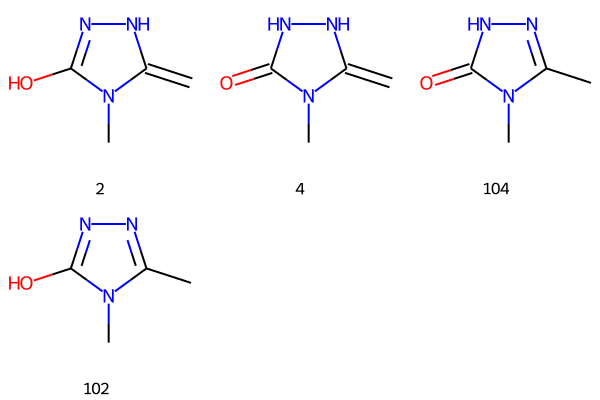

In [57]:
scores = [te.ScoreTautomer(x) for x in tauts]
Draw.MolsToGridImage(tauts,legends=[str(x) for x in scores])

## Tautomer-insensitive searching
(2020.09 release)

You can now do a substructure search which matches all tautomers of the query structure.

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<unsigned long, std::allocator<unsigned long> > already registered; second conversion method ignored.


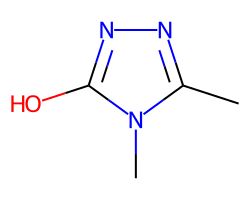

In [58]:
from rdkit.Chem import rdTautomerQuery
tm = Chem.MolFromSmiles('Cn1c(nnc1O)C')
tm

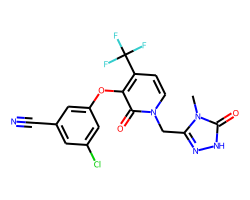

In [59]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [60]:
doravirine.HasSubstructMatch(tm)

False

In [61]:
tq = rdTautomerQuery.TautomerQuery(tm)
tq.IsSubstructOf(doravirine)

True

In [62]:
matches = tq.GetSubstructMatches(doravirine)
matches

((0, 1, 2, 3, 4, 5, 6, 7),)

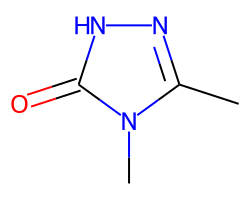

In [63]:
matches = tq.GetSubstructMatchesWithTautomers(doravirine)
matches[0][1]

In [64]:
Chem.MolToSmarts(tq.GetTemplateMolecule())

'[#6]-[#7]1-,=,:[#6](-,=,:[#7]-,=,:[#7]-,=,:[#6]-,=,:1-,=,:[#8])-,=,:[#6]'

**Important reminder:** the search looks for tautomers of the *query*, not of the molecule you're looking for the substructure in. 

Here's a demonstration of that (thanks to John Mayfield for the example):

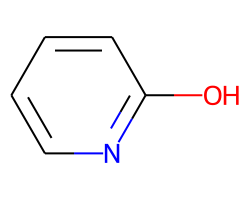

In [65]:
tm2 = Chem.MolFromSmiles('Oc1ncccc1')
tm2

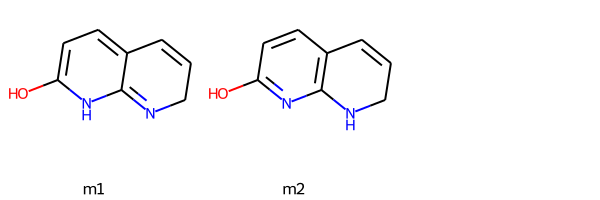

In [66]:
m1 = Chem.MolFromSmiles('OC1NC2=NCC=CC2=CC=1')
m2 = Chem.MolFromSmiles('OC1N=C2NCC=CC2=CC=1')
Draw.MolsToGridImage((m1,m2),legends=("m1","m2"))

In [67]:
tq2 = rdTautomerQuery.TautomerQuery(tm2)
tq2.IsSubstructOf(m1),tq.IsSubstructOf(m2)

(False, False)

### Tautomer-insensitive pattern fingerprints
Increases the efficiency when using pattern fingerprints to do screenout with the tautomer-insensitive search code.

In [68]:
from rdkit import DataStructs
fp1 = Chem.PatternFingerprint(doravirine)
fp2 = Chem.PatternFingerprint(tm)
print(fp2.GetNumOnBits(),DataStructs.AllProbeBitsMatch(fp2,fp1))

157 False


In [69]:
from rdkit import DataStructs
fp1 = Chem.PatternFingerprint(doravirine)
fp2 = Chem.PatternFingerprint(tq.GetTemplateMolecule())
print(fp2.GetNumOnBits(),DataStructs.AllProbeBitsMatch(fp2,fp1))

105 True


In [70]:
fp1 = Chem.PatternFingerprint(doravirine,tautomerFingerprints=True)
fp2 = Chem.PatternFingerprint(tq.GetTemplateMolecule(),tautomerFingerprints=True)
print(fp2.GetNumOnBits(),DataStructs.AllProbeBitsMatch(fp2,fp1))

145 True


## Additions to AdjustQueryProperties
(2020.09 release)

The function `AdjustQueryProperties()` is useful for translating normal molecules, like what you'd sketch in a chemical drawing package, into query molecules intended for use in substructure searches. 

Here we'll look at a few of the options recently added to `AdjustQueryProperties()`

Start with the function we'll use to display a table of molecules, queries, and whether or not they match.

In [71]:
from IPython.display import HTML, display
def match_table(qs,ms,useChirality=False,includeSmarts=True,useEnhancedStereo=False):
    tbl = '<table>'
    tr = ['<td>Molecules in rows, Queries in columns</td>']
    smatr = ['<td></td>']
    for q in qs:
        d2d = Draw.MolDraw2DSVG(200,150)
        d2d.drawOptions().prepareMolsBeforeDrawing=False
        d2d.drawOptions().addStereoAnnotation = True
        d2d.DrawMolecule(q)
        d2d.FinishDrawing()
        svg = d2d.GetDrawingText()
        tr.append(f'<td>{svg}</td>')
        smatr.append(f'<td>{Chem.MolToSmarts(q)}</td>')
    tbl += f'<tr>{"".join(tr)}</tr>'
    if includeSmarts:
        tbl += f'<tr>{"".join(smatr)}</tr>'
    substructPs = Chem.SubstructMatchParameters()
    substructPs.useChirality = useChirality
    substructPs.useEnhancedStereo = useEnhancedStereo
    for m in ms:
        tr=[]
        d2d = Draw.MolDraw2DSVG(200,150)
        d2d.drawOptions().addStereoAnnotation = True
        d2d.DrawMolecule(m)
        d2d.FinishDrawing()
        svg = d2d.GetDrawingText()
        tr.append(f'<td>{svg}</td>')
        for q in qs:
            tr.append(f'<td style="text-align:center">{m.HasSubstructMatch(q,substructPs)}</td>')
        tbl += f'<tr>{"".join(tr)}</tr>'
        
    tbl += '</table>'
    return tbl

### 5-rings likely to cause problems with aromaticity

Five-rings with at least three conjugated bonds have all non-query bonds replaced with an `SINGLE|DOUBLE|AROMATIC` query.

In [72]:
fivering_qs = [x for x in Chem.SDMolSupplier('./data/five_ring_queries.sdf')]

In [73]:
fivering_ms = [x for x in Chem.SDMolSupplier('./data/five_ring_mols.sdf')]

In [74]:
tbl = match_table(fivering_qs,fivering_ms)
display(HTML(tbl))

In [75]:
mqs = []
for q in fivering_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustConjugatedFiveRings = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,fivering_ms)
display(HTML(tbl))

### Single-atom neighbors to aromatic rings

Single bonds from aromatic atoms to atoms of degree one are converted to `SINGLE|AROMATIC` queries.

In [76]:
aromaticNeighbor_qs = [x for x in Chem.SDMolSupplier('./data/aromatic_neighbors_queries.sdf')]
aromaticNeighbor_mols = [x for x in Chem.SDMolSupplier('./data/aromatic_neighbors_mols.sdf')]
tbl = match_table(aromaticNeighbor_qs,aromaticNeighbor_mols)
display(HTML(tbl))

In [77]:
mqs = []
for q in aromaticNeighbor_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustSingleBondsToDegreeOneNeighbors = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,aromaticNeighbor_mols)
display(HTML(tbl))

### Single bonds between aromatic atoms

Single bonds between aromatic atoms are converted to `SINGLE|AROMATIC` queries.

In [78]:
aromaticBridge_qs = [x for x in Chem.SDMolSupplier('./data/aromatic_bridge_qs.sdf')]
aromaticBridge_mols = [x for x in Chem.SDMolSupplier('./data/aromatic_bridge_mols.sdf')]
tbl = match_table(aromaticBridge_qs,aromaticBridge_mols)
display(HTML(tbl))

In [79]:
mqs = []
for q in aromaticBridge_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustSingleBondsBetweenAromaticAtoms = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,aromaticBridge_mols)
display(HTML(tbl))

### "MDL" aromaticity

A special case for aromatic five-rings containing "A" atoms (these are "any" atom queries from Mol files): the ring bonds are converted to either `SINGLE|AROMATIC` or `DOUBLE|AROMATIC` queries.

In [80]:
q = Chem.MolFromMolBlock('''
  Mrv1824 09252016342D          

  5  5  0  0  0  0            999 V2000
    6.4509    3.6482    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.7835    3.1633    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0384    2.3787    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8634    2.3787    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.1183    3.1633    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  1  5  1  0  0  0  0
M  END
''')
Chem.MolToSmarts(q)

'[!#1]1:[#6]:[#6]:[#6]:[#6]:1'

In [81]:
q1 = Chem.MergeQueryHs(q)
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.setMDLFiveRingAromaticity = True
q1 = Chem.AdjustQueryProperties(q1,ps)
Chem.MolToSmarts(q1)

'[!#1]1-,:[#6]=,:[#6]-,:[#6]=,:[#6]-,:1'

## MolEnumerator
(2020.09 release)

Enumerating features from Mol files

This is an initial implementation, more features will be added in future releases.

In [82]:
IPythonConsole.molSize = (250,200)

### Position variation bonds

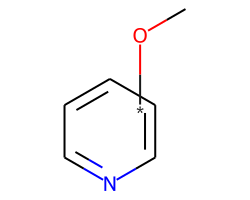

In [83]:
position_variation_mol = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
position_variation_mol

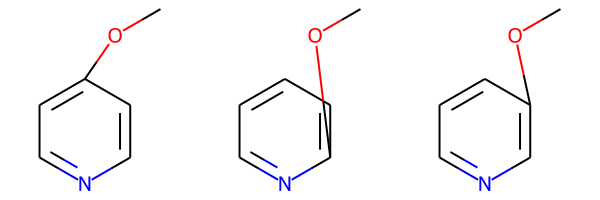

In [84]:
from rdkit.Chem import rdMolEnumerator
ps = rdMolEnumerator.MolEnumeratorParams(rdMolEnumerator.EnumeratorType.PositionVariation)
bndl = rdMolEnumerator.Enumerate(position_variation_mol,ps)
Draw.MolsToGridImage(bndl)

Those look better if we regenerate coordinates for them:

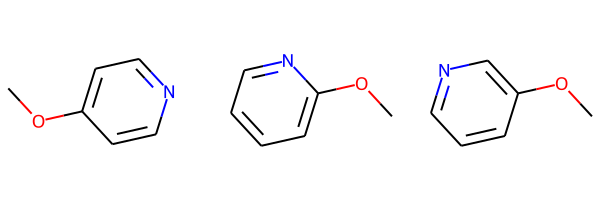

In [85]:
from rdkit.Chem import rdDepictor
for m in bndl:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(bndl)

### Link nodes

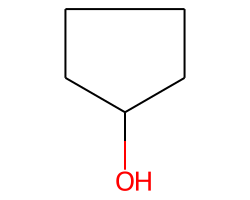

In [86]:
linknode_mol = Chem.MolFromMolBlock('''one linknode
  Mrv2007 06222005102D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 6 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 8.25 12.1847 0 0
M  V30 2 C 6.9164 12.9547 0 0
M  V30 3 C 6.9164 14.4947 0 0
M  V30 4 C 9.5836 14.4947 0 0
M  V30 5 C 9.5836 12.9547 0 0
M  V30 6 O 8.25 10.6447 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 4 5
M  V30 4 1 1 5
M  V30 5 1 3 4
M  V30 6 1 1 6
M  V30 END BOND
M  V30 LINKNODE 1 4 2 1 2 1 5
M  V30 END CTAB
M  END''')
linknode_mol

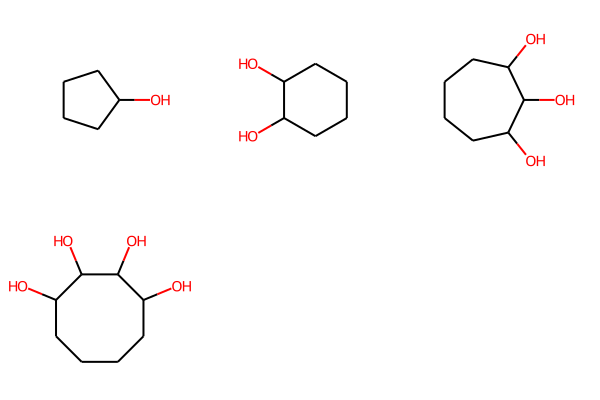

In [87]:
ps = rdMolEnumerator.MolEnumeratorParams(rdMolEnumerator.EnumeratorType.LinkNode)
bndl = rdMolEnumerator.Enumerate(linknode_mol,ps)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(bndl)

### An aside: what can you do with a MolBundle?

In [88]:
ps = rdMolEnumerator.MolEnumeratorParams(rdMolEnumerator.EnumeratorType.LinkNode)
bndl = rdMolEnumerator.Enumerate(linknode_mol,ps)
for m in bndl:
    rdDepictor.Compute2DCoords(m)


In [89]:
bndl.HasSubstructMatch(Chem.MolFromSmiles('C1CCCC1O'))

True

In [90]:
bndl.HasSubstructMatch(Chem.MolFromSmiles('C1CCC(O)C1O'))

False

In [91]:
bndl.HasSubstructMatch(Chem.MolFromSmiles('C1CCCC(O)C1O'))

True

In [92]:
Chem.MolFromSmiles('C1CCCC(O)C1O').HasSubstructMatch(bndl)

True

In [93]:
Chem.MolFromSmiles('C1CCCCC1O').HasSubstructMatch(bndl)

False

## Enhanced stereo and substructure search

The substructure matcher can also, optionally, take enhanced stereochemistry into account.

Here the rules are:
```
Substructure search using molecules with enhanced stereochemistry follows these rules (where substructure < superstructure):

* achiral < everything, because an achiral query means ignore chirality in the match
* chiral < AND, because AND includes both the chiral molecule and another one
* chiral < OR, because OR includes either the chiral molecule or another one
* OR < AND, because AND includes both molecules that OR could actually mean.
* one group of two atoms < two groups of one atom, because the latter is 4 different
diastereomers, and the former only two of the four.
```


Start by looking at the match table if we don't take enhanced stereo into account:

In [94]:
smis = ('C[C@H](F)O[C@H](O)F','C[C@@H](F)O[C@@H](O)F','C[C@H](F)O[C@@H](O)F',
        'C[C@H](F)O[C@H](O)F |o1:1,4|','C[C@H](F)O[C@H](O)F |&1:1,4|')

ms = [Chem.MolFromSmiles(x) for x in smis]
HTML(match_table(ms,ms,includeSmarts=False,useChirality=True))

Now use enhanced stereo:

In [95]:
HTML(match_table(ms,ms,includeSmarts=False,useChirality=True,useEnhancedStereo=True))

*Note*: these tables are transposed relative to what you find in the RDKit documentation.

## New stereochemistry code
(2020.09 release)

Demonstrate the shortcomings of the legacy code:

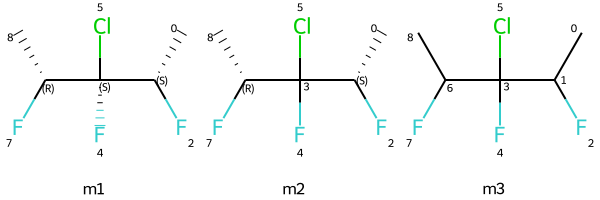

In [96]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
m1 = Chem.MolFromSmiles('C[C@H](F)[C@](F)(Cl)[C@H](F)C')
m2 = Chem.MolFromSmiles('C[C@H](F)C(F)(Cl)[C@H](F)C')
m3 = Chem.MolFromSmiles('CC(F)C(F)(Cl)C(F)C')
Draw.MolsToGridImage((m1,m2,m3),legends=('m1','m2','m3'))

In [97]:
# The old behavior, still the default for FindMolChiralCenters()
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                                    includeUnassigned=True))

[(1, 'S'), (3, 'S'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (6, '?')]


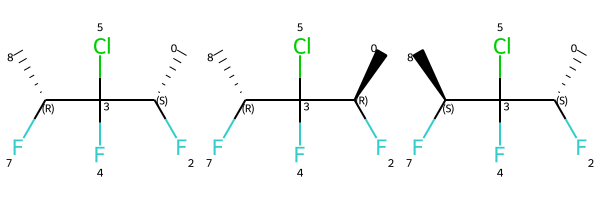

In [98]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

The new code is directly available using `Chem.FindPotentialStereo()`

In [99]:
print("m2")
si = Chem.FindPotentialStereo(m2)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')
print("m3")
si = Chem.FindPotentialStereo(m3)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

m2
  Type: Atom_Tetrahedral, Which: 1, Specified: Specified, Descriptor: Tet_CCW 
  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 6, Specified: Specified, Descriptor: Tet_CCW 
m3
  Type: Atom_Tetrahedral, Which: 1, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 6, Specified: Unspecified, Descriptor: NoValue 


In [100]:
m = Chem.MolFromSmiles('C/C=C/CC=CC/C=C/C')
si = Chem.FindPotentialStereo(m)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

  Type: Bond_Double, Which: 1, Specified: Specified, Descriptor: Bond_Trans 
  Type: Bond_Double, Which: 4, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 7, Specified: Specified, Descriptor: Bond_Trans 


We can also use the new code in `Chem.FindMolChiralCenters()` by using the `useLegacyImplementation` argument.


[(1, 'S'), (3, 's'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (3, '?'), (6, '?')]


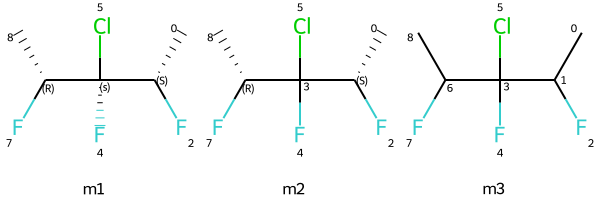

In [101]:
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                                    includeUnassigned=True,
                                    useLegacyImplementation=False))
Draw.MolsToGridImage((m1,m2,m3),legends=('m1','m2','m3'))

And after telling `FindMolChiralCenters()` to use the new code, we get all answers from `EnumerateStereoisomers()` too:

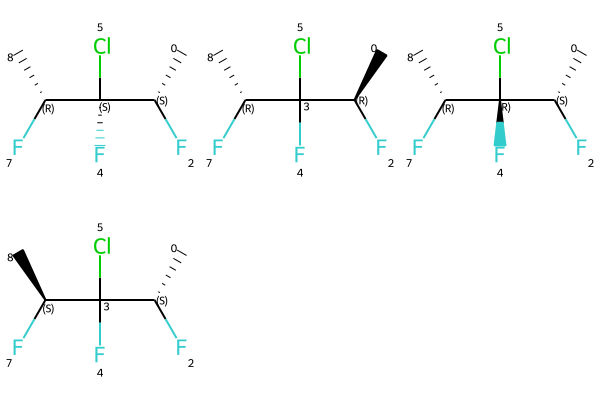

In [102]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

An extreme example:

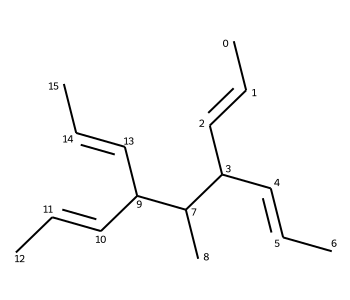

In [103]:
IPythonConsole.molSize = (350,300)
# Thanks to Salome Rieder for this example
mol = Chem.MolFromSmiles('CC=CC(C=CC)C(C)C(C=CC)C=CC')
mol

In [104]:
si = Chem.FindPotentialStereo(mol)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')
_ = Chem.FindMolChiralCenters(m,force=True,
                                includeUnassigned=True,
                                useLegacyImplementation=False)

  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 7, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 9, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 1, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 4, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 10, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 13, Specified: Unspecified, Descriptor: NoValue 


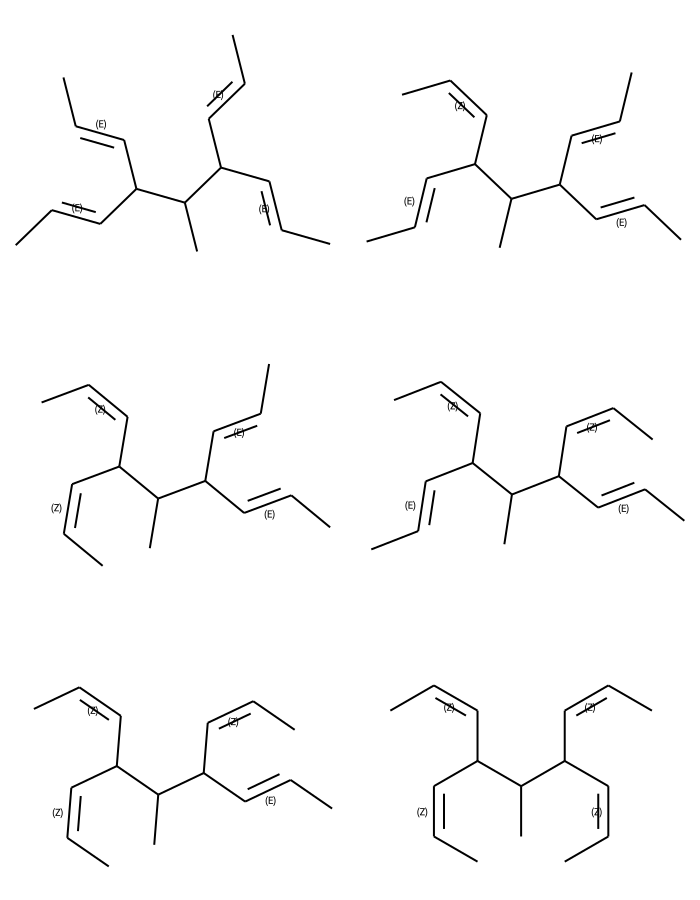

In [105]:
IPythonConsole.drawOptions.addAtomIndices = False

ms = EnumerateStereoisomers.EnumerateStereoisomers(mol)
Draw.MolsToGridImage(list(ms),molsPerRow=2,subImgSize=(350,300))

This will be expanded and likely become the default for the 2021.03 release.

### Accurate CIP labels

Start with a molecule that the current code gets wrong:

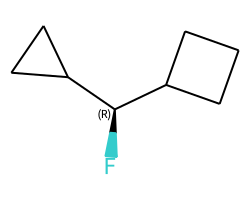

In [106]:
IPythonConsole.molSize = (250,200)
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
m = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m

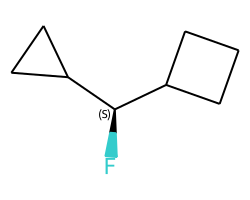

In [107]:
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m)
m

Ring stereochemistry was previously also not properly labelled:

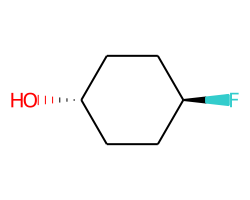

In [108]:
m = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
m

But it is now:

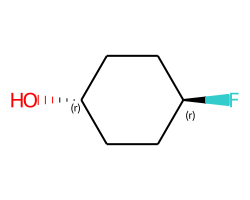

In [109]:
rdCIPLabeler.AssignCIPLabels(m)
m

## Better handling of isotopes with RemoveHs()


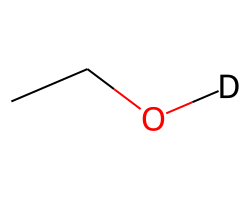

In [110]:
IPythonConsole.drawOptions.atomLabelDeuteriumTritium=True
m = Chem.MolFromSmiles('CCO[2H]')
m

By default the D is not removed by `RemoveHs()`:

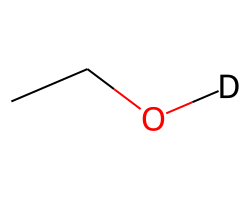

In [111]:
Chem.RemoveHs(m)

But we can change that by setting `removeAndTrackIsotopes` in the `RemoveHsParameters()`

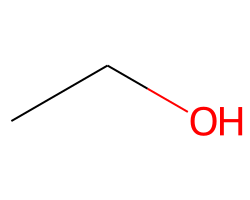

In [112]:
ps = Chem.RemoveHsParameters()
ps.removeAndTrackIsotopes=True
nm = Chem.RemoveHs(m,ps)
nm

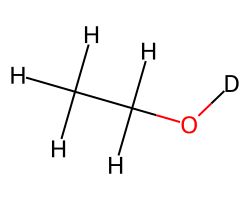

In [113]:
Chem.AddHs(nm)

# License

This document is copyright (C) 2020 by Greg Landrum

This work is licensed under the Creative Commons Attribution-ShareAlike 4.0 License.
To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/4.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.